In [1]:
import pickle as pkl
import pandas as pd

with open("C:\\Users\\Binaryxx Sune\\Documents\\Programming\\personal_projects\\data\\pro_comp.pkl", "rb") as pro_comp_file:
    comp = pkl.load(pro_comp_file)

with open("C:\\Users\\Binaryxx Sune\\Documents\\Programming\\personal_projects\\data\\pro_map.pkl", "rb") as pro_map_file:
    val_map = pkl.load(pro_map_file)

with open("C:\\Users\\Binaryxx Sune\\Documents\\Programming\\personal_projects\\data\\pro_outcome.pkl", "rb") as pro_outcome_file:
    outcome = pkl.load(pro_outcome_file)

# Create a df
pro_df = pd.DataFrame({"comp": comp, "outcome": outcome, "val_map": val_map})

# Remove rows where there is no team comp captured
pro_df.dropna(subset = ["comp"], inplace = True)

# Remove the PICK at the end of the map name played on that some instances have
def remove_pick(val_map):
    if val_map[-4:] == "PICK":
        return val_map[:-4]
    else:
        return val_map

pro_df["val_map"] = pro_df["val_map"].apply(remove_pick)

# Convert win / lose to True / False
def outcome_convert(outcome):
    if outcome == "win":
        return True
    if outcome == "lose":
        return False

pro_df["outcome"] = pro_df["outcome"].apply(outcome_convert)
pro_df = pro_df.rename(columns = {"outcome": "win"})

In [2]:
def has_omen(comp):
    if "Omen" in comp:
        return True
    else:
        return False

pro_df["omen"] = pro_df["comp"].apply(has_omen)

omen_df = pro_df.groupby(["omen","val_map"], as_index = False)["win"].sum()
omen_df["match"] = pro_df.groupby(["omen","val_map"], as_index = False)["win"].count()["win"]


In [3]:
import numpy as np

omen_df["win_rate"] = np.around(omen_df["win"] / omen_df["match"], decimals = 2)
omen_df

,omen,val_map,win,match,win_rate
0,False,Ascent,17,33,0.52
1,False,Bind,17,33,0.52
2,False,Breeze,14,28,0.50
3,False,Fracture,27,53,0.51
4,False,Haven,15,27,0.56
5,False,Icebox,41,82,0.50
6,False,Lotus,0,1,0.00
7,False,Pearl,39,79,0.49
8,False,Split,1,2,0.50
9,True,Ascent,46,93,0.49


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def give_omen_correlation(val_map):
    map_df = omen_df[omen_df["val_map"] == val_map.capitalize()]
    map_df["win_rate"].round(2)

    sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})

    map_viz = sns.barplot(y = "match", x = "omen", hue = "win_rate", data = map_df, palette = "RdYlGn", dodge = False)

    plt.xlabel("omen on Team")
    map_viz.tick_params(labelsize = 10)
    plt.ylabel("Match Count")
    plt.title("Agents' Performance on "+ val_map.capitalize())

    plt.show()

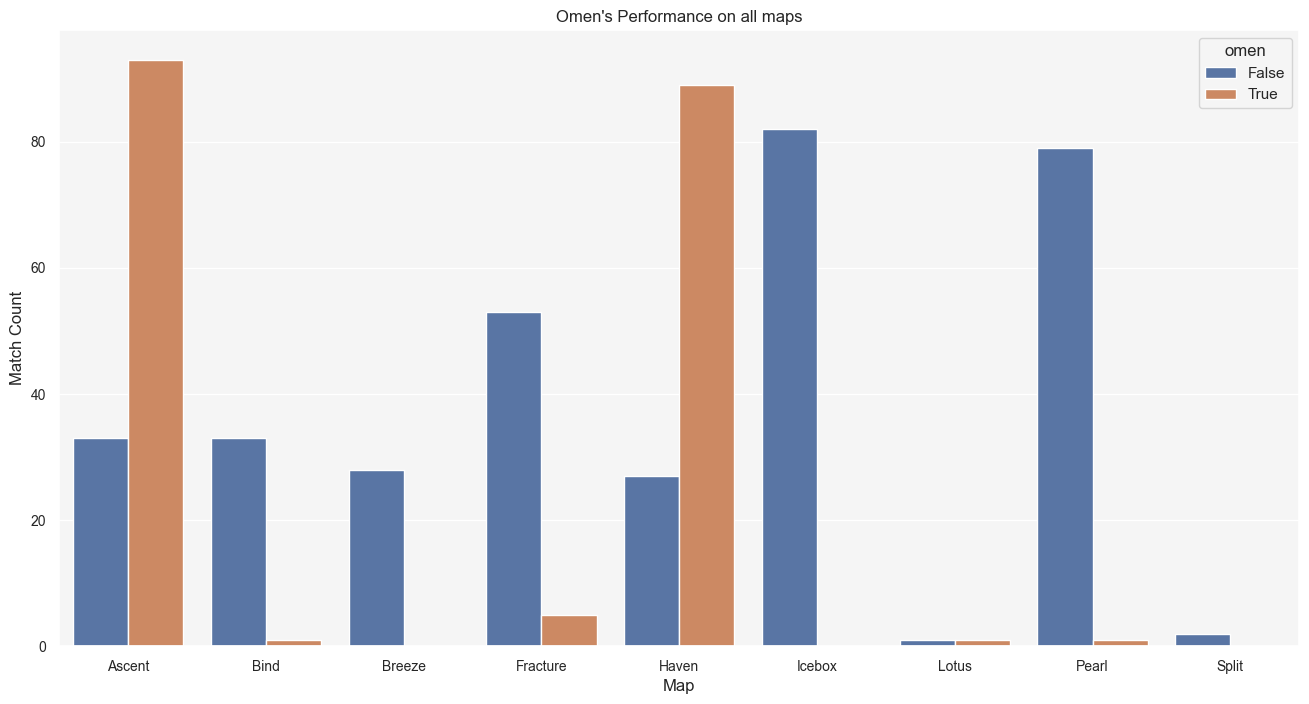

In [5]:
map_df = omen_df
map_df["win_rate"].round(2)

sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})

map_viz = sns.barplot(y = "match", x = "val_map", hue = "omen", data = map_df)

plt.xlabel("Map")
map_viz.tick_params(labelsize = 10)
plt.ylabel("Match Count")
plt.title("Omen's Performance on all maps")

plt.show()

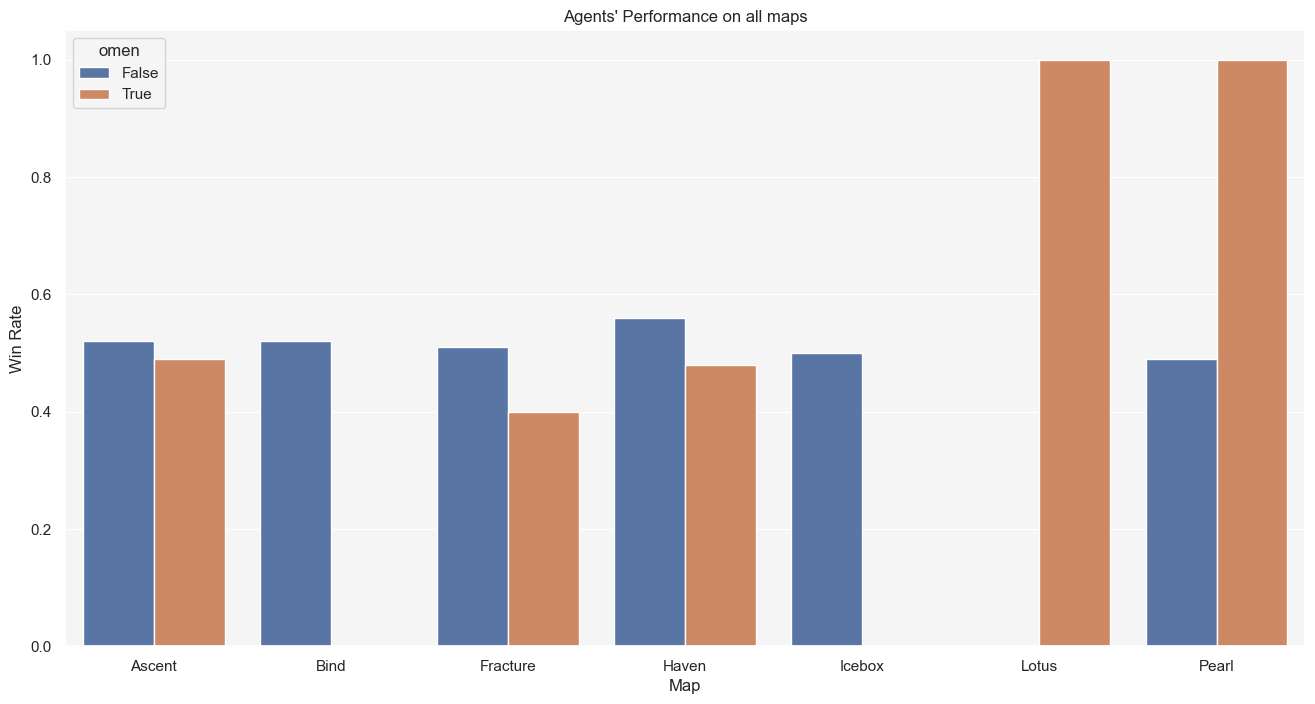

In [6]:
map_df = omen_df[~omen_df["val_map"].isin(["Split", "Breeze"])]
map_df["win_rate"].round(2)

sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})

map_viz = sns.barplot(y = "win_rate", x = "val_map", hue = "omen", data = map_df)

plt.xlabel("Map")
plt.ylabel("Win Rate")
plt.title("Agents' Performance on all maps")

plt.show()